In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import tree
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 

from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from keras.losses import MeanAbsolutePercentageError
import joblib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from numpy import loadtxt
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
#read file
read_file= pd.read_csv('final_data.txt', sep='	')
data=read_file
data=data.dropna()
data=data.astype(float)
data.columns=['Gc','j','c_old','soc_old','c_dot','soc_dot','d_dot']
df=data
#df
df

,Gc,j,c_old,soc_old,c_dot,soc_dot,d_dot
0,4.21,-0.3000,0.500000,0.500000,7.409167,0.600128,0.000000
1,4.21,-0.3000,0.507409,0.500600,3.954095,0.600128,0.000000
2,4.21,-0.3000,0.511363,0.501200,2.974950,0.600129,0.000000
3,4.21,-0.3000,0.514338,0.501800,2.501118,0.600128,0.000000
4,4.21,-0.3000,0.516839,0.502401,2.208906,0.600128,0.000000
...,...,...,...,...,...,...,...
12299,13.92,-0.0001,0.987004,0.987094,0.000201,0.000200,0.000086
12300,13.92,-0.0001,0.990530,0.990594,0.000202,0.000200,0.000087
12301,13.92,-0.0001,0.994061,0.994095,0.000202,0.000200,0.000089
12302,13.92,-0.0001,0.997600,0.997596,0.000202,0.000200,0.000093


In [4]:
#df.iloc[:,0]

In [5]:
#GC
print(min(df.iloc[:,0]))
print(max(df.iloc[:,0]))

4.21
13.92


In [6]:
#j
print(min(df.iloc[:,1]))
print(max(df.iloc[:,1]))

-0.3
-0.0001


In [7]:
#c_old
print(min(df.iloc[:,2]))
print(max(df.iloc[:,2]))

0.5
1.003217186101


In [8]:
#soc_old
print(min(df.iloc[:,3]))
print(max(df.iloc[:,3]))

0.5
1.0013275128919998


In [9]:
#c_dot
print(min(df.iloc[:,4]))
print(max(df.iloc[:,4]))

0.000199480131
7.409167018


In [10]:
#soc_dot
print(min(df.iloc[:,5]))
print(max(df.iloc[:,5]))

0.000199733153
0.600129


In [11]:
#d_dot
print(min(df.iloc[:,6]))
print(max(df.iloc[:,6]))

-3.3494799999999997e-06
1.549443


In [12]:
list(dict.fromkeys(df.iloc[:,0]))

[4.21, 5.97, 13.92]

In [13]:
#list(dict.fromkeys(df['j']))

In [14]:
#log J
df.iloc[:,1]=-np.log10( df.iloc[:,1]*-1)
#df['soc_dot']=-np.log10( df['soc_dot'])
#df['j']=-np.log10( df['j']*-1)  

In [15]:
#df=df[df['j']<3.3]
#df=df[df['j']>1]
#df
#-np.log10(0.008)

In [16]:
df

,Gc,j,c_old,soc_old,c_dot,soc_dot,d_dot
0,4.21,0.522879,0.500000,0.500000,7.409167,0.600128,0.000000
1,4.21,0.522879,0.507409,0.500600,3.954095,0.600128,0.000000
2,4.21,0.522879,0.511363,0.501200,2.974950,0.600129,0.000000
3,4.21,0.522879,0.514338,0.501800,2.501118,0.600128,0.000000
4,4.21,0.522879,0.516839,0.502401,2.208906,0.600128,0.000000
...,...,...,...,...,...,...,...
12299,13.92,4.000000,0.987004,0.987094,0.000201,0.000200,0.000086
12300,13.92,4.000000,0.990530,0.990594,0.000202,0.000200,0.000087
12301,13.92,4.000000,0.994061,0.994095,0.000202,0.000200,0.000089
12302,13.92,4.000000,0.997600,0.997596,0.000202,0.000200,0.000093


(0, 0.006)

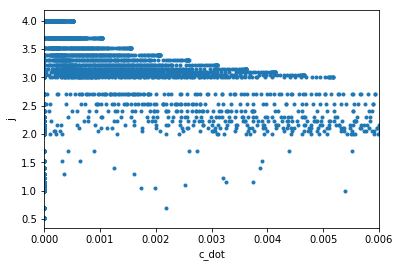

In [17]:
plt.scatter(df.iloc[:,6],df.iloc[:,1],marker='.')
plt.xlabel('c_dot')
plt.ylabel('j')
plt.xlim(0,0.006)

In [18]:
#df=df[df['J']<-0.001]


In [19]:
#data_num = data.to_numpy()
#print(data_num[0,:])

In [20]:
#reduced_data = np.array([])
#reduced_data2 = np.array([])

#number = 0

# for i in data_num[:]:
    
#     if i[0] <= -0.25:
        
#         number += 1
#         #print(number)
#         reduced_data = np.append(reduced_data, i, axis = 0 )
#         #reduced_data.append(i)
    
#     else:
        #max
#         reduced_data2 = np.append(reduced_data2, i, axis = 0 )
        
    
# reduced_data = np.reshape(reduced_data, (int(reduced_data.shape[0]/3), 3))

# print(" number of elements for j < -0. 25 size is ",reduced_data.shape)


# reduced_data2 = np.reshape(reduced_data2, (int(reduced_data2.shape[0]/3), 3))

# print(" number of elements for j > -0. 25 size is ", reduced_data2.shape)

# print( "In total there are  " + str(int(reduced_data.shape[0]) + int(reduced_data2.shape[0])) + " samples")


In [21]:
#plt.hist(reduced_data[:,0])

In [22]:
#plt.hist(reduced_data2[:,0])


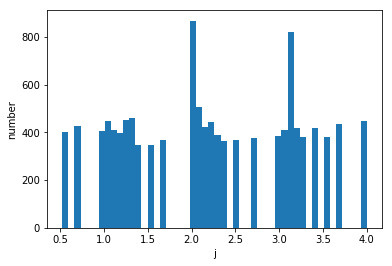

In [23]:
#j
plt.hist(df.iloc[:,1], bins=50)
# #plt.ylim(0.2,0.4)
# plt.xlim(-0.1,0)

plt.xlabel('j')
plt.ylabel('number')
plt.show()

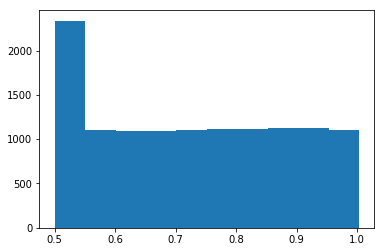

In [24]:
#c_old
plt.hist(df['c_old'])
# #plt.ylim(0.2,0.4)
# plt.xlim(-0.1,0)
plt.show()

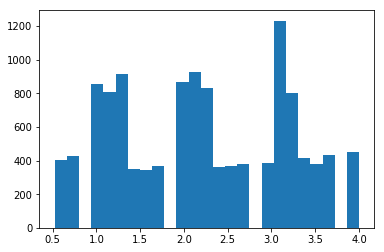

In [25]:
plt.hist(df['j'],bins=25)
# #plt.ylim(0.2,0.4)
# plt.xlim(-0.1,0)
plt.show()

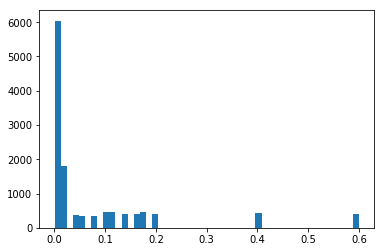

In [26]:
plt.hist(df['soc_dot'],bins=50)
# #plt.ylim(0.2,0.4)
# plt.xlim(-0.1,0)
plt.show()

In [27]:
print(min(df['c_dot']))
print(max(df['c_dot']))

0.000199480131
7.409167018


In [28]:
df=df[df['j']>2.5]
#df

## transformation

In [29]:
X=df.iloc[:,0:4]
y=df.iloc[:,4:7]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25,random_state=40)

from sklearn.preprocessing import MinMaxScaler 
#scaler = StandardScaler()

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled_data=scaler.transform(X_train)
X_test_scaled_data=scaler.transform(X_test)

scaler_y = MinMaxScaler()

#scaler_y = StandardScaler()
scaler_y.fit(np.array(y_train))
y_train_scaled_data=scaler_y.transform(np.array(y_train))
y_test_scaled_data=scaler_y.transform(np.array(y_test))

In [29]:
# model = Sequential()
# model.add(Dense(1024*6, input_dim=4, activation='relu'))
# #model.add(Dense(32, activation='relu'))
# model.add(Dense(3,activation='relu'))
# # compile the keras model
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [30]:
# history=model.fit(X_train_scaled_data, y_train_scaled_data, epochs=1000, batch_size=10)

In [31]:
# y_pred = model.predict(X_test_scaled_data)
# y_pred_train= model.predict(X_train_scaled_data)
# mseMLP = mean_squared_error(y_test_scaled_data, y_pred)
# maeMLP = mean_absolute_error(y_test_scaled_data, y_pred)
# print("Train R2 score MLP: {:.5f}".format(r2_score(y_pred_train, y_train_scaled_data)))
# print("Test R2 score MLP: {:.5f}".format(r2_score(y_pred, y_test_scaled_data)))
# print("MSE MLP: %.4f" % mseMLP)  
# print("MAE MLP:", maeMLP)

In [32]:
##filename = 'model_V2_06_1000.sav'
#joblib.dump(model, filename)
#np.savetxt('history_V1.txt',history)

In [33]:
#history

In [34]:
#import joblib
#model= joblib.load('keras_1024_200_v2.sav')

In [30]:
# #load the saved model and test the performance
import joblib
M_s= joblib.load('model_128_1000_101021.sav')
y_pred = M_s.predict(X_test_scaled_data)
y_pred_train= M_s.predict(X_train_scaled_data)
mseMLP = mean_squared_error(y_test_scaled_data, y_pred)

#print("Train R2 score MLP: {:.5f}".format(M_s.score(X_train_scaled_data, y_train_scaled_data)))


#print("Test R2 score MLP: {:.5f}".format(M_s.score(X_test_scaled_data, y_test_scaled_data)))



print("MSE MLP: %.4f" % mseMLP)


print("MAE MLP:", mean_absolute_error(y_test_scaled_data, y_pred))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
MSE MLP: 0.0000
MAE MLP: 0.002002259488186695


In [32]:
y_pred = M_s.predict(X_test_scaled_data)
y_pred_train= M_s.predict(X_train_scaled_data)
mseMLP = mean_squared_error(y_test_scaled_data, y_pred)
maeMLP = mean_absolute_error(y_test_scaled_data, y_pred)
print("Train R2 score MLP: {:.5f}".format(r2_score(y_pred_train, y_train_scaled_data)))
print("Test R2 score MLP: {:.5f}".format(r2_score(y_pred, y_test_scaled_data)))
print("MSE test MLP: %.4f" % mseMLP)  
print("MAE MLP:", maeMLP)

Train R2 score MLP: 0.99184
Test R2 score MLP: 0.99199
MSE test MLP: 0.0000
MAE MLP: 0.002002259488186695


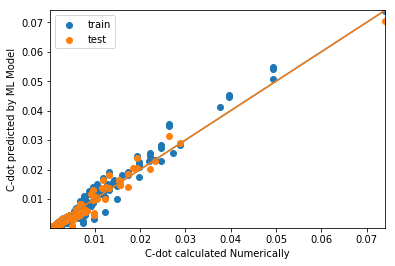

In [33]:
plt.scatter(np.array(y_train.iloc[:,0]),scaler_y.inverse_transform(y_pred_train)[:,0],label='train')
plt.scatter(np.array(y_test.iloc[:,0]),scaler_y.inverse_transform(y_pred)[:,0],label='test')
plt.xlabel('C-dot calculated Numerically')
plt.ylabel('C-dot predicted by ML Model')

lims = [y_test.iloc[:,0].min(), y_test.iloc[:,0].max()]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

_ = plt.plot(lims, lims)
plt.legend()

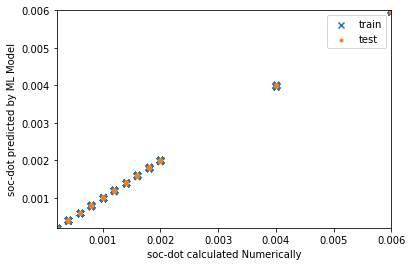

In [34]:
plt.scatter(np.array(y_train.iloc[:,1]),scaler_y.inverse_transform(y_pred_train)[:,1],marker='x',label='train')
plt.scatter(np.array(y_test.iloc[:,1]),scaler_y.inverse_transform(y_pred)[:,1],marker='.',label='test')
plt.xlabel('soc-dot calculated Numerically')
plt.ylabel('soc-dot predicted by ML Model')

lims = [y_test.iloc[:,1].min(), y_test.iloc[:,1].max()]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims,color='g')

#_ = plt.plot(lims, lims)
plt.legend()

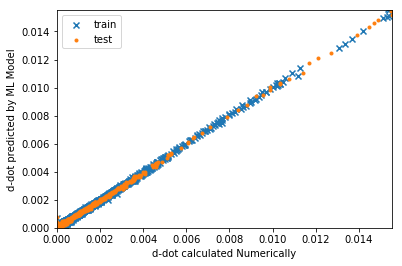

In [35]:
plt.scatter(np.array(y_train.iloc[:,2]),scaler_y.inverse_transform(y_pred_train)[:,2],marker='x',label='train')
plt.scatter(np.array(y_test.iloc[:,2]),scaler_y.inverse_transform(y_pred)[:,2],marker='.',label='test')
plt.xlabel('d-dot calculated Numerically')
plt.ylabel('d-dot predicted by ML Model')

lims = [y_test.iloc[:,2].min(), y_test.iloc[:,2].max()]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims,color='g')

#_ = plt.plot(lims, lims)
plt.legend()

In [ ]:
#########################################################################################################################